In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import  classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline 

In [65]:
import importlib
import ids_common
importlib.reload(ids_common)


<module 'ids_common' from '/mnt/d/stuff/univ/ids/ids_common.py'>

ML-EdgeIIoT-dataset

In [106]:
path_to_dataset = './dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'
df  = ids_common.prepare_dataset(path_to_dataset)
df.to_csv('./stuff/prepared_dataset.csv')


drop: NA: 0, DUPS: 5604
drop: NA: 0, DUPS: 5604
dropna: NA: 0, DUPS: 5604
drop_duplicates: NA: 0, DUPS: 0
################################################################################
TARGET: "Attack_label"
Attack_label
1    128095
0     24101
Name: count, dtype: int64
--------------------------------------------------------------------------------
TARGET: "Attack_type"
Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64
################################################################################


In [107]:
SEED = random.randint(0, 42424242)
SEED = 19884136
print(f'SEED = {SEED}')

target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'

SEED = 19884136


2 classes: Attack detection, classification Attack vs Normal 

In [162]:
def dataset_split(dataset, target):
    y = dataset[target]
    X = dataset.drop([target_label_2_class, target_label_15_class], axis=1, inplace=False)
    return train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

In [109]:
X_train, X_test, y_train, y_test = dataset_split(df, target_label_2_class)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (106537, 57), y_train: (106537,)
X_test: (45659, 57), y_test: (45659,)


Dummy classifier

True
[0.84163546 0.84165916 0.841631  ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7230
           1       0.84      1.00      0.91     38429

    accuracy                           0.84     45659
   macro avg       0.42      0.50      0.46     45659
weighted avg       0.71      0.84      0.77     45659



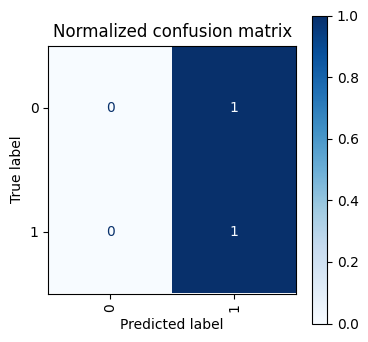

In [110]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
print(any(dummy_clf.predict(X_train)))

print(cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy"))

dummy_clf.fit(X_train, y_train)
predicted = dummy_clf.predict(X_test)
print(classification_report(y_test, predicted, zero_division=0))

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_estimator(
    dummy_clf,
    X_test,
    y_test,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(4, 4, forward=True)
plt.xticks(rotation=90)
plt.show()


In [115]:
def report(y_train, y_train_predict, y_test, y_test_predict):

    print('TRAIN:')
    print(classification_report(y_train, y_train_predict))

    print('TEST:')
    print(classification_report(y_test, y_test_predict))




In [120]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier(random_state=SEED)
print(cross_val_score(dt_cls, X_train, y_train, cv=3, scoring="accuracy"))

dt_cls.fit(X_train, y_train)

y_train_predict = dt_cls.predict(X_train)
y_test_predict = dt_cls.predict(X_test)


report(y_train, y_train_predict, y_test, y_test_predict)



[0.96142258 0.96187204 0.96147781]
TRAIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16871
           1       1.00      1.00      1.00     89666

    accuracy                           1.00    106537
   macro avg       1.00      1.00      1.00    106537
weighted avg       1.00      1.00      1.00    106537

TEST:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7230
           1       0.98      0.98      0.98     38429

    accuracy                           0.96     45659
   macro avg       0.93      0.93      0.93     45659
weighted avg       0.96      0.96      0.96     45659



In [117]:
from sklearn.model_selection import GridSearchCV

cls = DecisionTreeClassifier(random_state=SEED)
tree_param = {'criterion':['gini','entropy', 'log_loss'],
              'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

grid_search = GridSearchCV(cls, tree_param, verbose=3)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.957 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.958 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.958 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.958 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.956 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.966 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.967 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.967 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.967 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.965 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.974 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=6

In [126]:
# tuned_accuracy = grid_search.score(X_test, y_test)
# tuned_accuracy

In [127]:
# dt_best = grid_search.best_estimator_
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=SEED)
dt_best.fit(X_train, y_train)

y_train_predict = dt_best.predict(X_train)
y_test_predict = dt_best.predict(X_test)

report(y_train, y_train_predict, y_test, y_test_predict)

TRAIN:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     16871
           1       0.97      1.00      0.99     89666

    accuracy                           0.98    106537
   macro avg       0.99      0.92      0.95    106537
weighted avg       0.98      0.98      0.97    106537

TEST:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      7230
           1       0.97      1.00      0.99     38429

    accuracy                           0.98     45659
   macro avg       0.99      0.92      0.95     45659
weighted avg       0.98      0.98      0.97     45659



In [124]:
y_dt_score = dt_cls.predict_proba(X_test)[:, 1]  
y_dt_best_score = dt_best.predict_proba(X_test)[:, 1]  

fpr1, tpr1, _ = roc_curve(y_test, y_dt_score)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_dt_best_score)
roc_auc2 = auc(fpr2, tpr2)

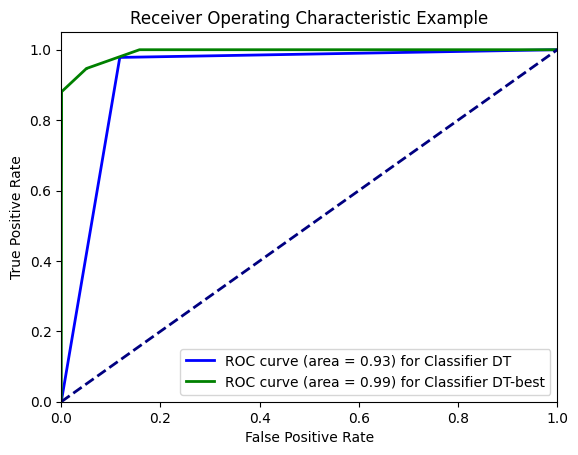

In [125]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label='ROC curve (area = %0.2f) for Classifier DT' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='ROC curve (area = %0.2f) for Classifier DT-best' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

In [128]:


# predicted = clf.predict(X_test)
# accuracy = accuracy_score(predicted, Y_test)
# print(f'Accuracy: {accuracy}')

# print(classification_report(Y_test, predicted))

# for imp, col in sorted(list(zip(clf.feature_importances_, X_train.columns)), reverse=True):
#     if imp > 0:
#         print(imp, col)


15 classes

In [129]:
X_train, X_test, y_train, y_test = dataset_split(df, target_label_15_class)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (106537, 57), y_train: (106537,)
X_test: (45659, 57), y_test: (45659,)


In [130]:
from sklearn.model_selection import GridSearchCV

cls = DecisionTreeClassifier(random_state=SEED)
tree_param = {'criterion':['gini','entropy', 'log_loss'],
              'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

grid_search = GridSearchCV(cls, tree_param, verbose=3)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.433 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.430 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.430 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.432 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.432 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.465 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.462 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.461 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.463 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.462 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.480 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=6

In [131]:
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=SEED)
dt_best.fit(X_train, y_train)

y_train_predict = dt_best.predict(X_train)
y_test_predict = dt_best.predict(X_test)

report(y_train, y_train_predict, y_test, y_test_predict)

TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.92      0.96      6906
            DDoS_HTTP       0.49      0.76      0.60      7346
            DDoS_ICMP       1.00      1.00      1.00      9167
             DDoS_TCP       1.00      1.00      1.00      7173
             DDoS_UDP       1.00      1.00      1.00     10149
       Fingerprinting       0.99      0.68      0.81       597
                 MITM       1.00      1.00      1.00       251
               Normal       0.67      0.95      0.79     16871
             Password       0.99      0.58      0.73      6980
        Port_Scanning       0.87      1.00      0.93      6245
           Ransomware       1.00      0.88      0.94      6782
        SQL_injection       0.85      0.55      0.67      7197
            Uploading       0.87      0.53      0.66      7150
Vulnerability_scanner       0.95      0.90      0.92      7043
                  XSS       0.92      0.66     

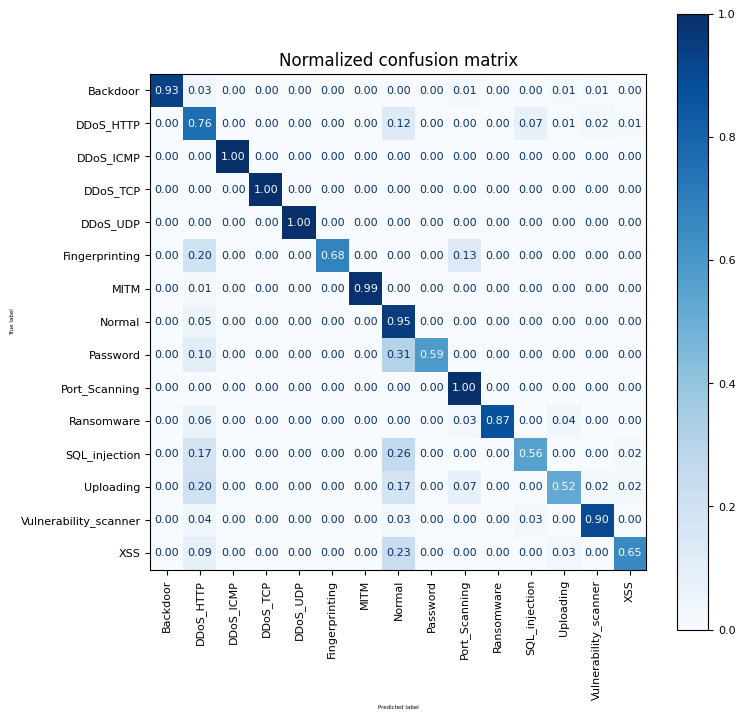

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(8, 8, forward=True)

np.set_printoptions(precision=1) 

plt.xticks(rotation=90)
plt.show()

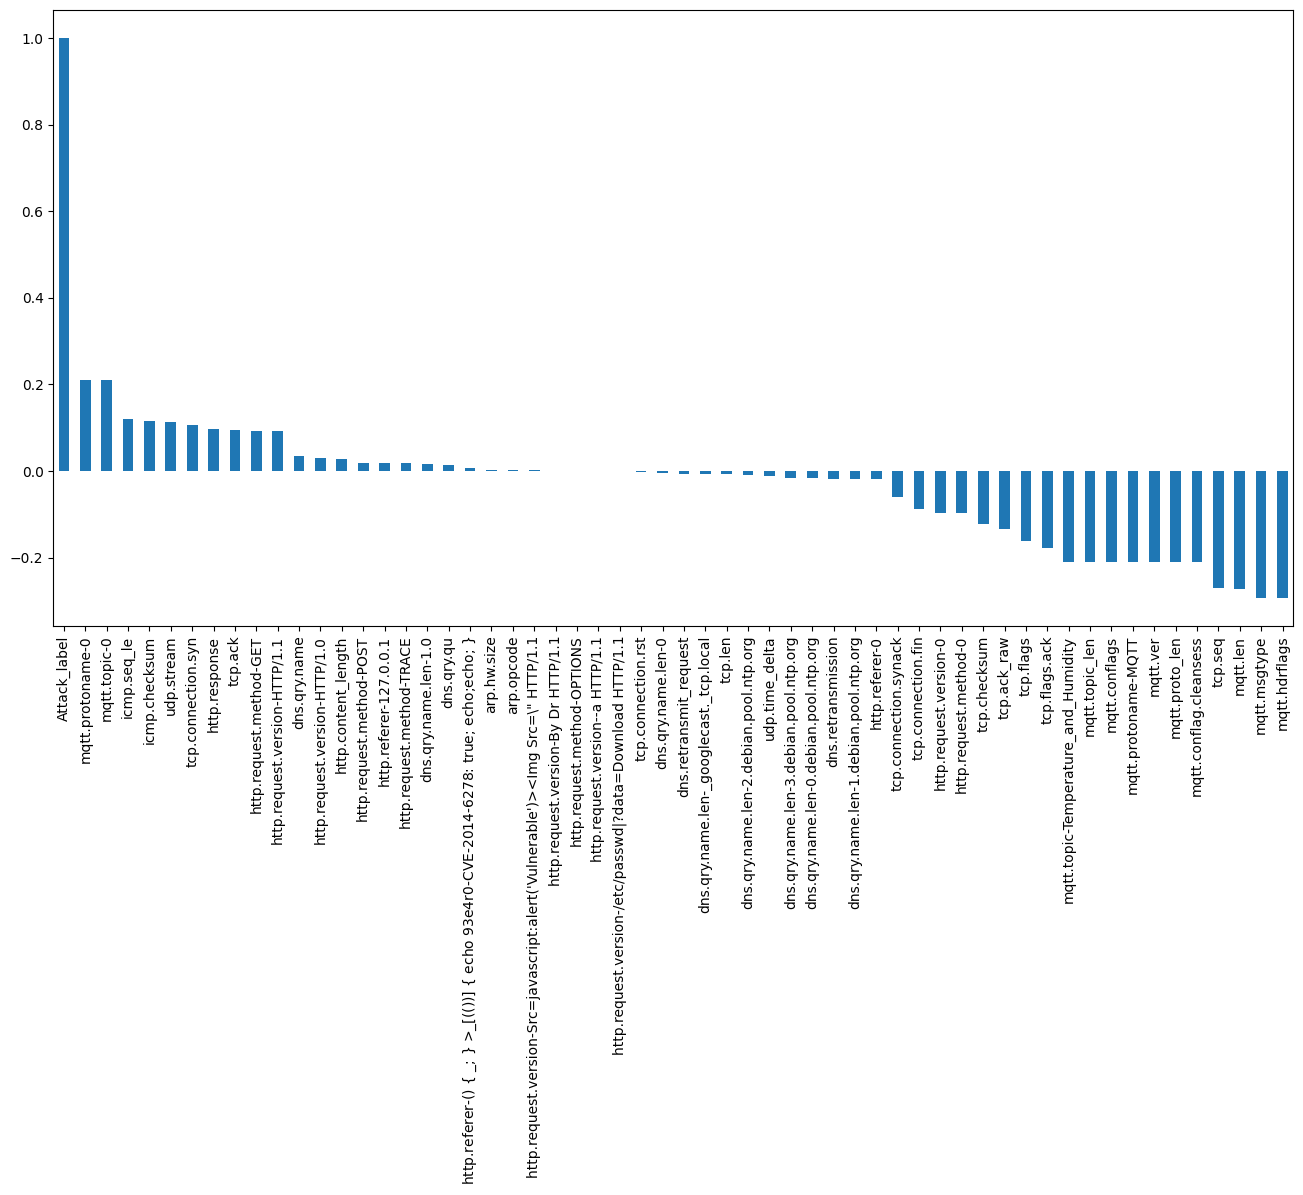

Attack_label                                                                         1.000000
mqtt.protoname-0                                                                     0.209794
mqtt.topic-0                                                                         0.209455
icmp.seq_le                                                                          0.121136
icmp.checksum                                                                        0.116376
udp.stream                                                                           0.114264
tcp.connection.syn                                                                   0.107291
http.response                                                                        0.096792
tcp.ack                                                                              0.094671
http.request.method-GET                                                              0.092900
http.request.version-HTTP/1.1                               

In [75]:

tdf = df.drop([target_label_15_class], axis=1, inplace=False).copy()
# # df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
# tdf['attack-type'], Attack_type_classes = pd.factorize(df[target_label_15_class])


corr = tdf.corr()
corr = corr[target_label_2_class]

corr = corr.sort_values(ascending=False)

ax = corr.plot.bar(figsize=(16, 8))
# ax.bar_label(ax.containers[0])

plt.xticks(rotation=90)
plt.show()

print(corr)


In [157]:



# from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]


# plt.figure(figsize=(1600, 1600)) 

# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
#         clf,
#         X_test,
#         Y_test,
#         # display_labels=Attack_type_classes,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.xticks(rotation=90)
# plt.show()

In [156]:
# X_train, X_test, y_train, y_test = dataset_split(target_label_15_class)

# print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
# print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')


path_to_dataset = './dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'
df  = ids_common.prepare_dataset(path_to_dataset)

df_attack_only = df[ (df[target_label_2_class] == 1) & (df[target_label_15_class] != 'Normal') ]
# df.to_csv('./stuff/prepared_dataset.csv')


drop: NA: 0, DUPS: 5604
drop: NA: 0, DUPS: 5604
dropna: NA: 0, DUPS: 5604
drop_duplicates: NA: 0, DUPS: 0
################################################################################
TARGET: "Attack_label"
Attack_label
1    128095
0     24101
Name: count, dtype: int64
--------------------------------------------------------------------------------
TARGET: "Attack_type"
Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64
################################################################################


In [163]:
df_attack_only[target_label_15_class].value_counts()

Attack_type
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Normal                       0
Name: count, dtype: int64

In [164]:
X_train, X_test, y_train, y_test = dataset_split(df_attack_only, target_label_15_class)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

from sklearn.model_selection import GridSearchCV

cls = DecisionTreeClassifier(random_state=SEED)
tree_param = {'criterion':['gini','entropy', 'log_loss'],
              'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

grid_search = GridSearchCV(cls, tree_param, verbose=3)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)



X_train: (89666, 57), y_train: (89666,)
X_test: (38429, 57), y_test: (38429,)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.410 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.406 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.410 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.410 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.410 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.487 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.480 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.483 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.485 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.485 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=6;, 

In [165]:
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=SEED)
dt_best.fit(X_train, y_train)

y_train_predict = dt_best.predict(X_train)
y_test_predict = dt_best.predict(X_test)

report(y_train, y_train_predict, y_test, y_test_predict)

TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.93      0.96      6906
            DDoS_HTTP       0.62      0.95      0.75      7346
            DDoS_ICMP       1.00      1.00      1.00      9167
             DDoS_TCP       1.00      1.00      1.00      7173
             DDoS_UDP       1.00      1.00      1.00     10149
       Fingerprinting       0.98      0.72      0.83       597
                 MITM       1.00      1.00      1.00       251
             Password       0.66      0.89      0.76      6980
        Port_Scanning       0.89      1.00      0.94      6245
           Ransomware       1.00      0.89      0.94      6782
        SQL_injection       0.94      0.72      0.82      7197
            Uploading       0.94      0.64      0.76      7150
Vulnerability_scanner       1.00      0.97      0.98      7043
                  XSS       1.00      0.77      0.87      6680

             accuracy                         

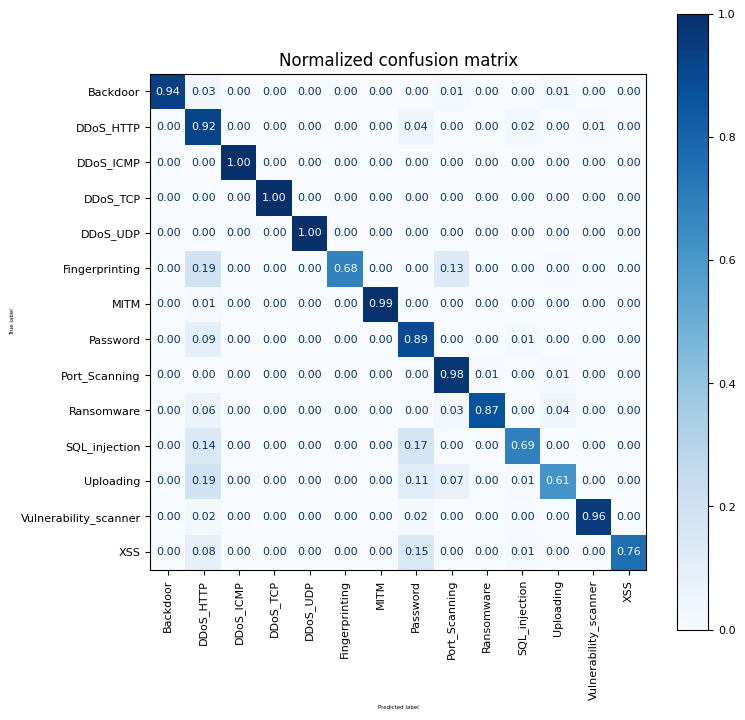

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(8, 8, forward=True)

np.set_printoptions(precision=1) 

plt.xticks(rotation=90)
plt.show()